In [0]:
 from numpy import load
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from google.colab import drive
import os

In [0]:
drive.mount('/content/gdrive',force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Segmented Numpy Data/'
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


['.config', 'gdrive', 'sample_data']

In [0]:
#prepare the data from the images we cut

data_output = np.zeros((1,6443008))
data_input = np.zeros((1,6443008)) 
all_files = sorted(os.listdir(base_dir))

for i in range(0,174):
    filename = all_files[i]
    if filename.endswith("seg.npz"): 
      dict_data1 = load(base_dir + filename)
      data_temp1 = dict_data1['arr_0']
      data_temp1 = data_temp1.reshape(1,6443008)
      data_output = np.vstack((data_output,data_temp1))
    else:
      dict_data2 = load(base_dir + filename)
      data_temp2 = dict_data2['arr_0']
      data_temp2 = data_temp2.reshape(1,6443008)
      data_input = np.vstack((data_input,data_temp2))

In [0]:
data_output = np.delete(data_output,0, axis = 0)
data_input = np.delete(data_input,0,axis = 0)
print(data_output.shape)
print(data_input.shape)

(87, 6443008)
(87, 6443008)


Downsample by a factor of 2 in each dimension, which means we divided each brain into eight pieces. After that we have 696=87*8 pieces of sample


In [0]:
data_input2 = data_input.reshape(87,176,208,176)
data_output2 = data_output.reshape(87,176,208,176)
print(data_output2.shape)
print(data_input2.shape)

(87, 176, 208, 176)
(87, 176, 208, 176)


In [0]:
#remove outliers
data_input2[data_input2 < 0] = 0
data_input2[data_input2 > 255] = 255

data_output2[data_output2 < 0] = 0
data_output2[data_output2 > 255] = 255

In [0]:
#find the boundary of x, y, z axis in each image
index = np.zeros((87,6))

# x-axis
for i in range(0,87):
  for j in range(0,88):
    if (np.sum(data_output2[i,j,:,:])) > 0:
      if j > 0:
        index[i,0] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,k,:,:])) > 0:
      if k < 175:
        index[i,1] = k
        break

In [0]:
# y-axis
for i in range(0,87):
  for j in range(0,104):
    if (np.sum(data_output2[i,:,j,:])) > 0:
      if j > 0:
        index[i,2] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,:,k,:])) > 0:
      if k < 175:
        index[i,3] = k
        break

In [0]:
# z-axis
for i in range(0,87):
  for j in range(0,88):
    if (np.sum(data_output2[i,:,:,j])) > 0:
      if j > 0:
        index[i,4] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,:,:,k])) > 0:
      if k < 175:
        index[i,5] = k
        break

In [0]:
print(data_input2.shape)
print(data_output2.shape)

# The common boundaries are the following
# x-axis (42,121)
# y-axis (40,161)
# z-axis (32,134)

# Jimmy: We will adjust a few more or less pixels to fit a good
#        dimension shape (Y-axis -8, Z-axis +17) for the model
# Extract the part include ventricles
data_input_cut = data_input2[:,42:122,41:161,24:144]
data_output_cut = data_output2[:,42:122,41:161,24:144]
print(data_input_cut.shape)
print(data_output_cut.shape)
#Final Dimension should be 80, 120,120

(87, 176, 208, 176)
(87, 176, 208, 176)
(87, 80, 120, 120)
(87, 80, 120, 120)


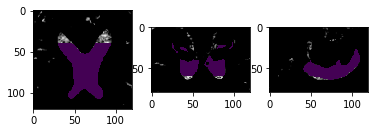

In [0]:
# See the first image for example

f, ax = plt.subplots(1,3)

ax[0].imshow(data_input_cut[0,50,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(data_output_cut[0,50,:,:], data_output_cut[0,50,:,:]==0.0))

ax[1].imshow(data_input_cut[0,:,50,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(data_output_cut[0,:,50,:], data_output_cut[0,:,50,:]==0.0))

ax[2].imshow(data_input_cut[0,:,:,50],cmap="Greys")
ax[2].imshow(np.ma.masked_array(data_output_cut[0,:,:,50], data_output_cut[0,:,:,50]==0.0))

In [0]:
data_input_cut_flipud = np.flip(data_input_cut, axis=1)
data_output_cut_flipud = np.flip(data_output_cut, axis=1)

In [0]:
data_input_cut_fliplr = np.flip(data_input_cut, axis=2)
data_output_cut_fliplr = np.flip(data_output_cut, axis=2)

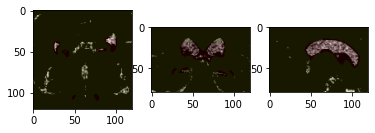

In [0]:
# See the first image for example

f, ax = plt.subplots(1,3)

ax[0].imshow(data_input_cut_flipud[0,52,:,:],cmap="Greys")
ax[1].imshow(data_input_cut_flipud[0,:,52,:],cmap='gist_gray_r')
ax[2].imshow(data_input_cut_flipud[0,:,:,52],cmap='gist_gray_r')

ax[0].imshow(1-data_output_cut_flipud[0,52,:,:],cmap="autumn",alpha=.1)
ax[1].imshow(1-data_output_cut_flipud[0,:,52,:],cmap="autumn",alpha=.1)
ax[2].imshow(1-data_output_cut_flipud[0,:,:,52],cmap="autumn",alpha=.1)

In [0]:
#Stick the flip data to previous data
data_input_cut_all = np.concatenate((data_input_cut, data_input_cut_flipud, data_input_cut_fliplr), axis=0)
data_output_cut_all = np.concatenate((data_output_cut, data_output_cut_flipud, data_output_cut_fliplr), axis=0)

In [0]:
#check the total shape for both input and output
print(data_input_cut_all.shape)
print(data_output_cut_all.shape)

(261, 80, 120, 120)
(261, 80, 120, 120)


In [0]:
X_dataset = data_input_cut_all
X_train = X_dataset[0:208,0:,0:,0:]
X_test = X_dataset[208:,0:,0:,0:]

Y_dataset = data_output_cut_all
Y_train = Y_dataset[0:208,0:,0:,0:]
Y_test = Y_dataset[208:,0:,0:,0:]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(208, 80, 120, 120)
(53, 80, 120, 120)
(208, 80, 120, 120)
(53, 80, 120, 120)


In [0]:
X_train = X_train.reshape(-1, 80,120,120, 1)
X_test = X_test.reshape(-1, 80,120,120,1)
Y_train = Y_train.reshape(-1,80,120,120, 1)
Y_test = Y_test.reshape(-1, 80,120,120, 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(208, 80, 120, 120, 1)
(53, 80, 120, 120, 1)
(208, 80, 120, 120, 1)
(53, 80, 120, 120, 1)


In [0]:
import keras
from keras import backend as K
from keras.layers.convolutional import Conv2D,Conv3D,Conv2DTranspose,MaxPooling3D,UpSampling3D
from keras.layers import Input, Dense, Activation,Dropout
from keras.layers import concatenate 
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [0]:
input_size = (80,120,120,1)

inputs = Input(input_size)
conv1 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling3D(pool_size=(2, 2, 2))(drop3)

conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)

up5 = Conv3D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(drop4))
merge5 = concatenate([conv3,up5], axis = 4)
conv5 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge5)

up6 = Conv3D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv5))
merge6 = concatenate([conv2,up6], axis = 4)
conv6 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv3D(8, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv6))
merge7 = concatenate([conv1,up7], axis = 4)
conv7 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv7 = Conv3D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv8 = Conv3D(1, 1, activation = 'sigmoid')(conv7)

model = Model(input = inputs, output = conv8)

model.compile(optimizer = Adam(lr = 1e-4), loss = "binary_crossentropy", metrics = ['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 120, 120, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 80, 120, 120, 224         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 80, 120, 120, 1736        conv3d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling3d_1 (MaxPooling3D)  (None, 40, 60, 60, 8 0           conv3d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
epochs = 40
filepath = "model_{epoch:03d}-{loss:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=[checkpoint])

In [0]:
from google.colab import files
files.download("model_024-0.0565.h5")

In [0]:
#Loading from checkpoint which we paused at 24th before
epochs = 40
new_model = load_model('/content/gdrive/My Drive/model_024-0.0565.h5')
filepath = 'model_{epoch:03d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = new_model.fit(X_train,   Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 208 samples, validate on 53 samples
Epoch 1/40
208/208 [==============================] - 1008s 5s/step - loss: 0.0570 - accuracy: 0.9717 - val_loss: 0.0502 - val_accuracy: 0.9790

Epoch 00001: saving model to model_001-0.0570.h5
Epoch 2/40
208/208 [==============================] - 1013s 5s/step - loss: 0.0562 - accuracy: 0.9725 - val_loss: 0.0479 - val_accuracy: 0.9802

Epoch 00002: saving model to model_002-0.0562.h5
Epoch 3/40
208/208 [==============================] - 1003s 5s/step - loss: 0.0570 - accuracy: 0.9733 - val_loss: 0.0518 - val_accuracy: 0.9788

Epoch 00003: saving model to model_003-0.0570.h5
Epoch 4/40
208/208 [==============================] - 1003s 5s/step - loss: 0.0562 - accuracy: 0.9732 - val_loss: 0.0459 - val_accuracy: 0.9801

Epoch 00004: saving model to model_004-0.0562.h5
Epoch 5/40
208/208 [==============================] - 1007s 5s/step - loss: 0.0547 - accuracy: 0.9732 - val_loss: 0.0466 - val_accuracy: 0.9801

Epoch 00005: saving model to model

KeyboardInterrupt: ignored

In [0]:
from google.colab import files
files.download("model_034-0.0390.h5")
files.download("model_035-0.0403.h5")
files.download("model_036-0.0383.h5")


In [0]:
#Loading from checkpoint which we paused at 36th before
epochs = 40
new_model = load_model('/content/gdrive/My Drive/model_036-0.0383.h5')
filepath = 'model_{epoch:03d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = new_model.fit(X_train,   Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 208 samples, validate on 53 samples
Epoch 1/40
208/208 [==============================] - 1006s 5s/step - loss: 0.0396 - accuracy: 0.9848 - val_loss: 0.0461 - val_accuracy: 0.9867

Epoch 00001: saving model to model_001-0.0396.h5
Epoch 2/40
208/208 [==============================] - 1001s 5s/step - loss: 0.0390 - accuracy: 0.9852 - val_loss: 0.0360 - val_accuracy: 0.9885

Epoch 00002: saving model to model_002-0.0390.h5
Epoch 3/40
208/208 [==============================] - 940s 5s/step - loss: 0.0372 - accuracy: 0.9857 - val_loss: 0.0400 - val_accuracy: 0.9876

Epoch 00003: saving model to model_003-0.0372.h5
Epoch 4/40
208/208 [==============================] - 934s 4s/step - loss: 0.0370 - accuracy: 0.9858 - val_loss: 0.0417 - val_accuracy: 0.9874

Epoch 00004: saving model to model_004-0.0370.h5
Epoch 5/40
208/208 [==============================] - 945s 5s/step - loss: 0.0403 - accuracy: 0.9844 - val_loss: 0.0500 - val_accuracy: 0.9848

Epoch 00005: saving model to model_00

In [0]:
from google.colab import files
files.download("model_040-0.0279.h5")

In [0]:
#Loading from checkpoint which we paused at 40th before
epochs = 40
new_model = load_model('/content/gdrive/My Drive/model_040-0.0279.h5')
filepath = 'model_{epoch:03d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = new_model.fit(X_train,   Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 208 samples, validate on 53 samples
Epoch 1/40
208/208 [==============================] - 1015s 5s/step - loss: 0.0275 - accuracy: 0.9899 - val_loss: 0.0377 - val_accuracy: 0.9891

Epoch 00001: saving model to model_001-0.0275.h5
Epoch 2/40
208/208 [==============================] - 1021s 5s/step - loss: 0.0283 - accuracy: 0.9898 - val_loss: 0.0345 - val_accuracy: 0.9888

Epoch 00002: saving model to model_002-0.0283.h5
Epoch 3/40
208/208 [==============================] - 1023s 5s/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0576 - val_accuracy: 0.9797

Epoch 00003: saving model to model_003-0.0277.h5
Epoch 4/40
208/208 [==============================] - 1021s 5s/step - loss: 0.0282 - accuracy: 0.9897 - val_loss: 0.0314 - val_accuracy: 0.9902

Epoch 00004: saving model to model_004-0.0282.h5
Epoch 5/40
208/208 [==============================] - 1015s 5s/step - loss: 0.0274 - accuracy: 0.9900 - val_loss: 0.0421 - val_accuracy: 0.9867

Epoch 00005: saving model to model

In [0]:
# Change the directory accordingly here
X_testing= np.load('OAS1_0084_MR.npz')['arr_0'][44:132,52:156,44:132]
Y_testing= np.load('OAS1_0084_MRseg.npz')['arr_0'][44:132,52:156,44:132]

X_testing = X_testing.reshape(1,88,104,88,-1)

print(X_testing.shape)
print(Y_testing.shape)

y_predict = np.around(model.predict(X_testing))
y_predict = y_predict.reshape(-1,88,104,88)


In [0]:
PJ = y_predict.reshape(-1)
AJ = Y_testing.reshape(-1)

count = 0
for i in range(PJ.shape[0]):
    if PJ[i] == AJ[i]:
        if PJ[i]==1:
            count += 1
        
total = np.count_nonzero(big_Y_plot)
        
print(count)      
print("Predicted Accuracy :", count/total)

In [0]:
#PREDICTION

f, ax = plt.subplots(1,3)

X_plot = X_testing.reshape(88,104,88)
y_plot = y_predict.reshape(88,104,88)

# Since we truncated 25% of data on each side, we need to recalculate the index accordingly

ax[0].imshow(X_plot[56,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(y_plot[56,:,:], y_plot[56,:,:]==0.0))

ax[1].imshow(X_plot[:,18,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(y_plot[:,18,:], y_plot[:,18,:]==0.0))

ax[2].imshow(X_plot[:,:,6],cmap="Greys")
ax[2].imshow(np.ma.masked_array(y_plot[:,:,6], y_plot[:,:,6]==0.0))

In [0]:
big_Y_plot = Y_testing.reshape(88,104,88)

f, ax = plt.subplots(1,3)

ax[0].imshow(X_plot[56,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(big_Y_plot[56,:,:], big_Y_plot[56,:,:]==0.0))

ax[1].imshow(X_plot[:,18,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(big_Y_plot[:,18,:], big_Y_plot[:,18,:]==0.0))

ax[2].imshow(X_plot[:,:,6],cmap="Greys")
ax[2].imshow(np.ma.masked_array(big_Y_plot[:,:,6], big_Y_plot[:,:,6]==0.0))

In [0]:
print("Correct Segmented Percentage: ",round(np.count_nonzero(big_Y_plot)/PJ.shape[0],5))
print("Correct Empty Part Percentage: ", round(np.count_nonzero(big_Y_plot==0)/PJ.shape[0],5))